In [17]:
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
import matplotlib.pyplot as plt
import numpy as np
import codecs
import os

In [18]:
imagePath = "image.png"
ttfontname = "C:\\Windows\\Fonts\\meiryob.ttc"
outputtextpath = 'output.txt'

def make_text_Image(text,fontsize=12,isVartical=True):
    """
    converting text to images

    This code converts character text into images and supports both vertical and horizontal writing.
    """

    margin = int(fontsize / 3)
    textLength = len(text)
    canvasSize = (fontsize,fontsize)
    if isVartical:
        canvasSize = (fontsize+margin,fontsize*textLength + margin)
    else:
        canvasSize = (fontsize*textLength +margin,fontsize +margin)
    backgroundRGB = (255, 255, 255)
    textRGB       = (0, 0, 0)
    img  = PIL.Image.new('RGB', canvasSize, backgroundRGB)
    draw = PIL.ImageDraw.Draw(img)
    font = PIL.ImageFont.truetype(ttfontname, fontsize)
    if isVartical:
        for i in range(textLength):
            topleft = (canvasSize[0]//2-fontsize//2,fontsize*i)
            draw.text(topleft, text[i], fill=textRGB, font=font)
    else:
        for i in range(textLength):
            topleft = (fontsize*i, canvasSize[1]//2-fontsize//2-margin//2)
            draw.text(topleft, text[i], fill=textRGB, font=font)
    img.save(imagePath)

# 文字の集合体で文字を書くコード

In [19]:
def print_text(imagePath:str,myword:str) -> None:
    """
    Create a collection of characters as a text file
    """
    im = PIL.Image.open(imagePath)
    im = im.convert('L')
    plt.gray()
    imagearray = np.asarray(im)
        
    plt.imshow(imagearray)
    
    count = 0
    def word_out(value:int,myword:str):
        """
        At coordinates where there are character lines in the image, 
        the string data is returned,
         and full-width spaces are returned where there are no characters.
        """
        mywordcount = len(myword)
        nonlocal count
        if value > 250:
            return "　"
        else:
            if count == mywordcount:
                count = 0
            count += 1
            return myword[count-1]
    
    if os.path.isfile(outputtextpath):
        os.remove(outputtextpath)

    for item in imagearray:
        mystr = "".join([word_out(i,myword=myword) for i in item])
        print(mystr, file=codecs.open(outputtextpath, 'a', 'utf-8'))


In [20]:
def print_text_right(imagePath:str,myword:str) -> None:
    """
    Create a collection of characters as a text file
    """
    im = PIL.Image.open(imagePath)
    im = im.convert('L')
    plt.gray()
    imagearray = np.asarray(im)
    imagearray = imagearray.T
    
    count = 0
    def word_out(value:int,myword:str):
        """
        At coordinates where there are character lines in the image, 
        the string data is returned,
         and full-width spaces are returned where there are no characters.
        """
        mywordcount = len(myword)
        nonlocal count
        if value > 250:
            return "　"
        else:
            if count == mywordcount:
                count = 0
            count += 1
            return myword[count-1]
    
    if os.path.isfile(outputtextpath):
        os.remove(outputtextpath)
    newarray =[]
    for index in range(len(imagearray)-1,0,-1):
        newarray.append([word_out(i,myword=myword) for i in imagearray[index]])
    newarray = newarray[::-1]
    arr_1d = np.array(newarray)
    imagearray = arr_1d.T
    
    for item in imagearray:
        mystr = "".join([i for i in item])
        print(mystr, file=codecs.open(outputtextpath, 'a', 'utf-8'))


# 実行

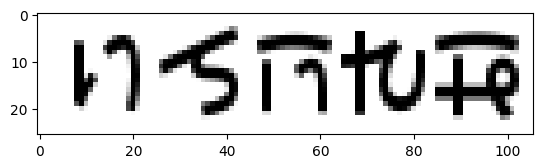

In [21]:
make_text_Image(text="こんにちは",fontsize=20)
# こんにちは、という言葉の集合体で、文字を描いていく。
# print_text(imagePath=imagePath,myword="こんにちは",isRightStart=True)
print_text_right(imagePath=imagePath,myword="こんにちは")